In [1]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from matplotlib import rc
import warnings
import seaborn as sb
warnings.filterwarnings('ignore')

In [6]:
large = 28; med = 24; small = 20
params = {'axes.titlesize': small,
          'legend.fontsize': small,
          'figure.figsize': (8, 4),
          'axes.labelsize': small,
          'axes.titlesize': small,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': med,
          'axes.titlepad': 10,
          'contour.negative_linestyle' : '--',
#           'axes.formatter.use_mathtext' : True,
#           'text.usetex' : True,
         'axes.facecolor': 'white'} #For electric background plots
plt.rcParams.update(params)
sb.set_style('darkgrid')

In [7]:
def setup_m(ax):
    
#     ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.add_feature(cfeature.COASTLINE)
    t1 = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,alpha=0.2)
    t1.xlabels_top = False
    t1.ylabels_right = False

    return ax

def open_ncfile(f):
    
    ds = xr.open_dataset(f)
    u = ds['u']
    v = ds['v']
    pv = ds['pv']
    h = ds['h']
    time = ds['time']
    lat = ds['lat']
    lon = ds['lon']
    lev = ds['lev']
    
    return h,u,v,pv,time,lat,lon,lev



In [8]:
f = '/arch5/twb/pv_inversion/GFS/2017091700/20170917_00Z_sqinvph.nc'
ds = xr.open_dataset(f)
u = ds['u']
v = ds['v']
pv = ds['pv']
time = ds['time']
lat = ds['lat']
lon = ds['lon']
lev = ds['lev']

FileNotFoundError: [Errno 2] No such file or directory: b'/arch5/twb/pv_inversion/GFS/2017091700/20170917_00Z_sqinvph.nc'

NameError: name 'lon' is not defined

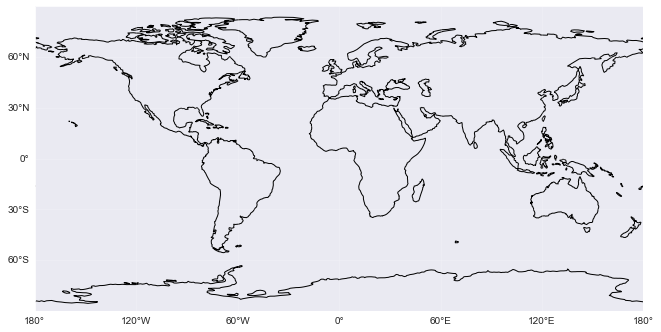

In [9]:
# plotting
fig = plt.figure(figsize=(24,12))

gs = gridspec.GridSpec(ncols=2,nrows=1)

ax1 = fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree())
m1 = setup_m(ax1)
m1.set_extent([lon[0],lon[-1],lat[0],lat[-1]],crs=ccrs.PlateCarree())
fig.patch.set_facecolor('white')
ax1.patch.set_facecolor('white')
fname = '/home/twb/tmp/NAtl_basin_map.png'
# plt.savefig(fname,dpi=1000,bbox_inches='tight')
